In [81]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

#얼굴 탐지 모델
detector=dlib.get_frontal_face_detector()
#얼굴 랜드마크 탐지 모델
sp=dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
#얼굴 인식 모델
facerec=dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')


In [82]:
#얼굴 찾기, 얼굴 랜드마크 찾기(눈, 코, 입 같은거)
def find_faces(image):
    dets=detector(image, 1)   #얼굴 찾은 결과물이 들어감

    #얼굴 하나도 못 찾았을 경우 빈 배열 반환
    if len(dets)==0:
        return np.empty(0), np.empty(0), np.empty(0)

    rects, shapes=[], []
    shapes_np=np.zeros((len(dets), 68, 2), dtype=np.int)
    #얼굴의 갯수만큼 루프를 돔
    for k, d in enumerate(dets):
        rect=((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        #68개의 점이 나옴. 랜드마크 찾기
        shape=sp(image, d)  

        for i in range(0, 68):
            shapes_np[k][i]=(shape.part(i).x, shape.part(i).y)  

        shapes.append(shape)  

    return rects, shapes, shapes_np

#랜드마크 정보를 인코더에 넣어주면 128개의 벡터가 나옴. 이 벡터들의 거리로 같은 사람인지 다른사람인지 판단
def encode_faces(image, shapes):
    face_decriptors=[]  #결과값 저장 리스트

    #랜드마크들의 배열 집합 크기만큼 루프
    for shape in shapes:
        #얼굴을 인코딩. 이 함수에는 전체 이미지와 랜드마크가 들어감
        face_descriptor=facerec.compute_face_descriptor(image, shape) 
        face_decriptors.append(np.array(face_descriptor))

    return np.array(face_decriptors)

In [83]:
#Compute Saved Face Descriptions
img_paths={
    'neo': 'image/neo.jpg',
    'trinity': 'image/trinity.jpg',
    'morpheus': 'image/morpheus.jpg',
    'smith': 'image/smith.jpg'
}

descs={
    'neo': None,
    'trinity': None,
    'morpheus': None,
    'smith': None
}

for name, img_path in img_paths.items():
    img_bgr=cv2.imread(img_path)
    #컬러 체계를 바꿈
    img_rgb=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    #인코딩하는 함수에 전체 이미지와 각 사람의 랜드마크를 넣어줌
    #인코딩된 결과를 각 사람의 이름에 맞게 저장
    _, img_shapes, _=find_faces(img_rgb)
    descs[name]=encode_faces(img_rgb, img_shapes)[0]

np.save('image/descs.npy', descs)
#print(descs)

In [84]:
#Compute Input
#단체 사진에서 얼굴을 찾음
img_bgr=cv2.imread('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUTExMWFhUXFxcaFxYYFhcdGhsZFx0YGBcVGBgYHiggHRomGxgXIjEhJSkrLi4uGB8zODMtNygtLisBCgoKDg0OGxAQGi0lICUtLS8tLS0tLS0tLS0vLy01LS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAQwAvAMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAFAAEDBAYCB//EAEEQAAIBAgQDBgMGBAYBAwUAAAECEQADBBIhMQVBUQYTImFxkTKBoQcUQrHB8CNSYtFDcoKS4fEzFcLiRFNzorL/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMABAX/xAAiEQACAgICAgMBAQAAAAAAAAAAAQIRAyESMUFRIjJhEyP/2gAMAwEAAhEDEQA/APFHMkfvnrVnWIqN7cNUuGWXHQb+h3/v8qukSbstcGYqWtnQxmH0/wCPatXwjFBXKxIyl5Mf4Xj7sDmS4TTyrL2rBfFSDGXUnyGkfOjgWFFyPEjByNfRvlVcdpEMlXZOMTlRrrScpyTvK2z3ZJ9TmajmDIS8twjwgoSfJSZPmMuvyrvs9grZw+It3W8RwpWOsjV1/wBeUf6hQnBXHuYVXjxFApkGZIg++nvV0/BJryQdp8Qyq0GO9xD3AOgGp/8A2KkVnrZ110PXWiHa7FqLyWif/HbA66trqf8ALlPzqLhaWTJuOYEQqAF2JnaYAURqT1EA8ozauiiTqzvDWtaP8PwrHSNNCSYAg7GT9KhwF3DAkw7CGItOogtByg3FubAwfhExtVtse93LnbRRCrLZQIgZRrFTZWNBPC2lZmIUBFDN0MD4dWk6kqPnUrXydvCBsqkgD5dfPem4IALigsACCCT8MEEa9R1G/wA6tXuHsoDyrIdAymRI5QYIO2451lMr/LRUYE76+sn86gazRGzZJ0H79ayPbztA1hhZs6MVlnjUCTETsTqfIRQ512FwVBv7tOhqviOHsgJHw89K8quXGcyxJPMkyfrWl7L9p7uFMNN60RrZdoUxBkE/CfTqdKZZk/BGWIIX+HuBmI0psNb1HqK3DW0xNlHUEC4oYSBPi1gx7UOfs+41gRPKnJuLRxYvEMZG3Krx1E1DxXCiVKyCIB8xUlrw6cvyrOLZSMlEp4rSo+J40W3SyNXgCOiqJdj0k6evpVsJmuKOWYT6DU/SgGJcNfv3I1Ay/M6/qaolxRCb5MD23zX3Y7D8xr/7q4t37Y+IrJM6mp8TaFpG/mO5825UEw+EDDMxEnXU1JtoeKT2OUPtVnhFuGdzsqsSPPlVfDPmIPPpVu6CskHwuIPruv1/OlXsb8LHA7MI7MJBOSf6V0n3P0q72ZxRuo6tqwJBHk8x9fyqXhVsIlsGRC5n9G+I/ItPy86o8MsMmMuqglFWHg9I1HnIP1p42uIj+XI0TYju7UIT42FrLzC6BhufxtZb/RRLB/4lqCpUW2XTXKxMEdQGRhVEYP8Ai2ydQROvNlUiPUyD/po3xS3nvI9kgBcIiGYkt8SSdsysSD6Gr7TJaaPPMbhxib91wVILGDuIHhA9gOdcXOH93csqF1dG1n1C6najNnh7Ak/iLctNvCPyotjcDF/DMCQVYAHpsqt9JqEo+SsZNugYtqxZYo4uOyGGKsFQsPithSubLMrnkHSQKs4e+twyyhW/mQAD5pB28o+Zqk9iDqdZMmZBPXNzmimD4dkI75+6J2UqWeP5igjKOhYieU71LssnRfw1lh6dRt77UdWye6t94curZQRJZWg5hGsSDrz03g1TwPdgMyWszKyj+Icwg5pOVQBOgHOJ50dewVVbt1mR7gMNlkiCfhUEZVjKJEnxGjFJdlJSb6KV1ltjIBtq5ad/5SFPLoZ1mvDuI4o4nFPcY5szGNPwjRQAOQEV7bi1sZHQZ3LKy5iQoGYRIUSTvzNeFFHtXGymcrFZA0MGNumlJMPg3vZbsDYxsTcZNdYjXqNa6+0L7N34Wi4q1dz2iwUg6MJ215jSrPZfthbwS2bmJsOEuIxVkA1gxm1I03rV9rOJ2eMWLVqxee3aUM7h7RDNAAVByEy2s/hpUm2aTSBfYQk4OyXkfF5nLmbLHyitbibyfhmIiJ0BHTr125mg+Hw4tIltdAqgAeQ2+lSZ66YQshknQzYIFpka8pqpew+Xl8qx3bntA7P3FliO7hncGNdgsj1+tBML22x1vQtnA5OM0fM+L607yxi6ZL+cpKzfImXOx/CjQfNvCPzNZniIGGt5n1LsWgbzrlX3IFFMB2n73CNfvqEAuRp+IIA0KOpZojrQjtHea41kMsM2UlehPig+koJp5STVoRRadMB8QLi2Wc+J/FHQQMq/KavcJuIlsKQSecCfKPYCusdhe8cKdgBJ9NtP3tVm3bAEAaetSSpjOS40ZdsQEZZH/XUUVCBlKnZgff8AevvQXHjcbmQB6CSfnqPar3Z/FZiLZOo1WfLX6VOMvlTLSj8bRruAWVOZHYMuUKZ3yrLXJ8otkfOhvCLLLYu3ROd2YqdyMohZ665hTKrD+IJWQUugfyt8X9/Sj2AtqltQRIyQSNpMmf8AfA/1V0RVnO3SLnC7gu2rbxMrJHORo8HkRBIrV9meCW763Gv6pmzFZgMSdFnkJE+c0C7JYVbYVTu4LAHppt8jRPGcOsKVvs17NaBVrVu8LYupMqtxSRmQEmdRO2tDLJpFMMOUi92qwWHsKGW2iAdAB5jWs9dRL9hLi7SR6RI3+Q9qC8axl1bOS7cttaJLW1FpVvakwjumjLr5n0ijnBcGU4eB5lhr1OvsSw9IrnjJ+S+RL0CsViu5ITDuRp47ikgs2ugaFOQbAQBIJjaqWCGpJ15idZJ6n5z8qhuIc/LfqP71ZHEcPhypvsIkMUklmUcgF2nXUxTJUiXbNj2ZwilXNwwhyk6bxL5NIklQWPQDUiqPHuNBma7cYKugGY6ADQD/AKrM8X+1QNauW7SOxZ/CzZUVUAIChEnfSdRoAK854lxO7fbNcct0HIeg2FScjqX4bPinbwK0WUzgbsxIHyG/zrIYN2YlRGZ25mBqdZPIedUK1P2f8NN7FWwULLIJKtlI859KTkY9vwnZ/C3sHhbV6zae3asghpmG0J10039jVJ7oYd3ZtJas5tMqRIECWPTn7eVEe1HEbeEwykHK164lpDzmGaZHkCJ/qFZj72x3Yn1JP51TDG1ZPI9l7EXQWJHU0E7S8W7i14NbryqAamevoKuXcQEUs2gArKMr3rveNIZoCL/KpGnzP5GuqKpHNOSbBOGwVwW3ytmZiudh8XUkeQyj/dQvGYdXnMWDydQunLcdf7Vu8FhCpBQrlZmnMgbRfAvhO+i/WqOKw9m5INtVZvxI2UDzKNoB6HrWePQqybsrnARh8FYP4odtP5yXk+gK1NisIb183JhUkT5kjQecKKM4l7b3zcDALaQhQCGGgCgysiNF1MUL+/hibaLK2wS7/hDHZAeZ39qZRVCttuwBjMSzXe5sQbjkyeSgc/WJPtUt9DbyoNcqgE9T1qTs1aBxF64ozFQ0tyXZQPUw30qLF4iHOm5/4/Sprq2UfdIzGcZ5Ow+kkwPaKJ9n8MAj3WEj4Z6DmR++VC7oKqwI1LR8h/0K0lqyEw6JJDFCSNYObcfWoQVyL5HUQrwi6t60GXmMpHRtv19jRcKAptqsSVWOUE6keUqvvWQ7OXDbeN1O49NjXoWCw4KoRuuoMTI/X/quyDuJxzVS0LFXxbuWmmCp21OhGoAGuoihvHu3Rtq6CyHt54kuc6kghZA02U86FdqVvWizghdMzGD4M+wUbkxzPXYTQq7wW+uHt2hbY3b7XLlyd1VAhVWG2aWJncbaHMKlmd6ovh18rA/E+PNe0ChRyA6dABtXqnYviF3FYFjdOZlLKDABgBSJCgAb14upHwqDmJ3O/oBW27I8YuYJvErd04h1IPoHE8x9R8q5420y06TRob3DLyW7uINtu7tozliIUgbDMYBkkaCZryjHYprrs7GSxJPzr0D7QuPl8PbsqfBrzMEzmLdP5QPTzNeb0Mkn0HHFdipxTUqkVOjVrh3Ebthw9pypHTb5jY1WpEU1ACfG+0eKxZU377vl+ETCr/lVdAfPetX2a7Wrci3fIV9g34W9eh+lefmnWjCTi9AlFNHreMfvWyxKIZII0ZhBP+kDU1LgrUGYkxI8tiSJ5+H61nuwvFi1i5ZOrLEMf5D+EfMfWtjhUOWDGv8Af+ymvQxtSjyPPyJqVHV21lTeIX5bRWH7P9n8RxMYkoyoGyZM5gHITCjmPUdTW64wpNorzYEfQ1kOxL4+1et2RaDWvFBCjYAsfFvOnOp530VwLsA9oMNi8DeRL6d24GhWMjJsYI3HWtP937nCyh+KWIOxEASDyMq3lVTGYzEcXYi/hjbW1/iAMoWWWQ+eZaAdorQ4+2G7tPEFCjyOm/uZ96GFN2zZ2lSM52fxCpYuWwpzmGedI3IB5nUt7V1hMLbiSgJJkkx6c/ICpOPle7bKBKSFIMFTuRPt5VkrbYy+A6l428MAaeQijKXClVgjFzt3RxicLqqudJEN1HNT5xsaN8XObKJBEggjlANREk3LaZQwJmTt4dR8/KrlywSSSoGbZp5kiZ9t/OljHsMpXVjcGwWbUjT9f+60/DuNizFskAwco1kgnRR56H5CosHgItoIjVZbWNd80bCar2eJWxcxGcZVtvJ10gZUya8yLY9zVa46JLds0nEMEly2l+4yBc63YuEBStsgjPP4QQunOsl2g7fu7GzgzLNIa8w365A2wnmfas/x3i+I4hsCuHtk5RrEnUlpOreQ26VQxmGs2FgjPcI57DzgVCc29rr2dEYpaffoIcFuWkl7pAEnxRq7TqZ6TsNuZopj8emSdlIJ8QJJHWKynCbFx2ziIQRJAgek6T7/ADqfj2JI8GpLQWZhqR+EeQoRyVAEsdzoocSx3eEATlXYHz3NUqVKuZtt2zqSpUhU4pqegEcU9MtdRTIDOKeku9O1CjG1+zy2IusTuUX0Akk/X6V6BZkjNyEaeZn/AOVed9jHyrHVsx/ID2Fes8Aw+gkSdJrvxyUcaOGcXLIzP424S+k7dKqcA73v17p1TKzEhmZZDaaEMNCCdPStB9q2EZLGHv2jDJeif8yNAP8ATKgHyJpuymKw960rjLaumM6OdjzysdCPLepZcnNFsMOErsK4u4gU5o8Op/lzaxFYXj+IuNe7pDlLkDPuRry6amtdewVq9iXAuZ8glVnwl4BJDD56fpWRs4N7mMdT4SitmkbSIP0bf0qsKUaRHI25WzP9orAsWO7EyFMknUu8Bj/uJox2M4bd+6qQVUMSQGBJ08M6ea0C7WMzkCCZaWJjYakk7DU0ewPaZbVq3bS07BEUFoAlgPERJ2mdaGuYV9DJ8IxDOGNxScojMOp5x1HlWrwluVA3B/WgGCseBVB1YyR1BMfkaNcJXxlU1QE6HkBTY9CZHfRU7VKigMIDLoDLSvKAVgqTAMifOs7gLTYok3GOQEG4RuzdFG3mSYo52idr9sEqQts3hI/xACRbOmngyup9F60C4HjALZSYJOhmN95qU9z30VjahrsJX7rsosWFVApknZVUbFj1J/KqH3a1bljOIuE/EdLYJ8z8X72q/guE3Ln8RFDIzZV7yFVgvMaz1O3OiXE/uWEt+JBcYkEACCCNiCTos+U6UeNq2DlTpHFi3ZtWbdxmiRLAQPHzlfXb6VieLYzvrrPEA7DyGgp8fxF7xljAGiqNAB0HyqlUMuTlpdF8WPjt9ipUqVRLDimp6QFYw4rsiuUqbLTxWhWyBedJjTrTDel8BNV2FOZyP5dffb9a9WucR7i2rTuyr/uIFeS9hDF5vQfnRT7ReKOTaRGhVmYOuf8A4BPua6ov/O2c0l/pSPQ+23aq0/d4RCtxh47sH4SVKqn+aCxPTTrWZsWmUQQQCOfP9/pXl9rEsjBxuDP/AHWjXt7ie7FsqhUGRod/KkWRId43Z6Hwm8EbNqDMyBsdNfpRPtFiAALiKs3FKMwOuU7j1B9ta8zt9uiN7YnykfSTPvR/CcVN/DhzPMgesCY6EgxVsclJkckXFFS3hkZi7CTOgOw8/Xzqvi7ksdo5UOxXFrjeC0oXqza/ONh9aqYzjLWmCZMxCiSZmY1oymkhI45ML2bhVxtAH5cvyoxwKwxU5ULsTAUDxEjXQdazuGuCGMRmOg9I/t9aOhmWycgBYLKyARO4kEGfSmi/IrW6NNg+BPasZr5S2jlmysZIn4jlBjXSsfjl4bh1K2rYLll8b+LSQfDuANPWou13bjvwmWZG6NOhiCraD6aaVh8TjGaRss/CNh6e5qDzKtrZ0/wqWno2fE+1Vu2htKuZgzFSpGQFiDJ84mQOp1rFYvFPcbM5k/QeQHKu8BgmutAIEbz0q3xThq2Qokkn8hU5Oc1fgeKhB15BhrmnNS4WwXdUG7ED351LssXhhsmFLne44C+iySff8qF0c7VXQHS0vw20A+Zj9AKB0ZqnQkHav2PXSimSZ0mfKpbbZj4o9Tv70EMx7YmrFu3rXNmxJABiTAkjy1I+f0NWTbNvPOoC6NGhJAP61ZEpAtTXKmn5VzUWWDvZ3Ed1nfnoB+/n9Km44c9ueYIPvofzobgRKv5Q3tv9Kv3we6nQgjkQYJmA0HQ6HeuiO40c0lU7L3ZfC27igOFYc0afcEV6FwnguBtWLj3MNh4ykZnTNB5AE/Cx615ZwhsQizaj51qLfHb7YZ0YkDnBJE9cqzTKnGqFdqV2C24Nbv30It5LQZQ5QLlygy7bjXLJ0k6VsOM2kRBkQJKglRoBpIWB0EAeQoD2fH88eJxLZdcsCQCVDaxtEa0X4ufDGvTU9aphikmxM0tpGbwVlYYkEkwAY0E7mfnWa4wc15z51tGWEUerfv3FZDHWiXYjr5UmRaoOKW7DGHWCq+lEeK4/u7Zj4mIVfU8/kP0qpatmQ3nBqhjrneX7f8qHT5bn3j2pm6QqVvZPxYpaUHIpjSCNyeenTfzoDi8T3hACBF6DnvrPWNPlU3F8V3jgDYV3duL4VUagQW/tUJJSkdEW4xQT4Lw+Iaq/EMNdxN1ktLmyDqB6nU9avW72S2TtAoX2f4obV4PO5E+8wfKnnSVInC3JyYx7L4wCTh3jyg//AMk112dw5S6zupXINiIIJ8j5T716rZ42i2XdtMinNB/FEx+XvXl+M4mbudm8JYEk6c6lDu34LZOqXkC4q8btxmP4iT8uQ9qiCSaka2V0IgkfQ13ZGtKlfYzdLRNh7JVZE5nOVfID4j+nvVrtMwVrdrKge2kXGVVUs51IbLuVECfWusDiXsuGUwRMTqPY6edD8WGJzOZZtZ566yfOnkqjQkXcrI8I5zLqBHXT1E1cv8S8LoyCSTsdNyfnHI+VGeFYfDJZJLIzHcMNves3jEhtI1nQVmnGIU1JlalSpVEqGezkZyDswg+nP86nvKLVt7MmQyhtNxmkHf8Ayx60Lwl7IVbz1rY8S4M+JtLes6uIzoIlgNis6Zh9flXTH66OeWp76BvAcUEQZog85g+x396rY5LjOwQhgdhIMzy0Mg11cthFOa5kA0AZDMjlK5gD8qGWsX/Lo8zr7ghtIPl9a0pUqYIw3yRrOziPbR1uQGzDKveZoiQ0QSNNNKL3LpGvxdc2orI8B4oWuZSAJDEcyW00k7aT7Vo71wxrVcUlx0RzL5bOL9zMGaI5bn6TtQm1h7cSYk679av4x8tse/vQg48DZW9hRk15Fin4I2uFQza7/n/xQ8XzDMTJHhHpz/SuuJYvMYB25a70OdtIqEpnTCGtkmEEtPzqQ6GuMLzNcTJ060i0h2rYV4riv4YG070FTerXEnlo6AVBYWTvHmeVCbuQYKoml4hxdBhkwtuI0NxxPxTO3P8A6oJmUkZpyjVvPyH751CT7/szXarAkjwg6+bcl/fnRbBRZuWy6s7EAnXXkBOVQeQj8qoq1RM5JJJ3qa1WUrYapBzAcP72zmn4SJ84JLfPKRQvG3M7E7a6enKKnw+LayTB8D+Fh/7h51SzQfL8vSmb1QiW7LZjKT5VRvNNObhbSurFkkx6zPIbT9aDdjRjXZXitj2K4FhnS5dxUZFYKpZsonmZkdRWOJ1one4ozrbtEwluYjqdcx8+WvWpqh2Fu3XB7OHa33IhXBMSSNI1E+tFuzPEP4eRWjMpWejEQre9Y7GYsNbs2h/h59f87T+/WrGBxBLlQYBB9fWRpvVMcqZPIrRasX8qXFdQzBTKtJGjqCPI6kac6A3isyoIHQmY8p51pOD2nGLyXTlN225zKRzBaQTpupoHxBzmKEKSD8YGp9jFCfVhh2ScEX+KpOwn3gwPetUbsispwliXVZ0BLR5xE1p8OJYD96VTD0Rz9kvEm0C+n0qrZtiPnUuNbxeg/P8A6qAsBAnlVn2SXRmb1zMRyH73qEmTSJphXE3Z3pUTL8NdYQeIeWtcFqZDCk9dP709i1o5vEklo3NNbOtSYfEldIkHcGmZVJ8Mx+VJ+oP4TnUZuZMKI386gvvsoOgn5k7n6D2q2hk75RlIEawgGvzO0+ZoeaMgRGq2gqstWUowNM6xfwjX0qnNT4pthVelm9hgqRNhozCdqNY65bZSRcLEDwiNtNRtrQFDVgHQ+lPB6EnG3ZWFS3viqIVYMFhO0H6TSLoo+yG1uPUUU4Vrejp8/wA6oWLBLD1FEOFEC4xHtB/SaeCponkemFeKYkJirFwfhEEf06z9C1ZM0Rx18u7ueQjQzvp/ehtDLK2bFGkGOz1iSzdAB76n8q0eFEEnoKp8GwmS0vVvEfnt9Iq4DANdGONRRzZJcpMp3Likklh6elRPkYyWq09pY1FVWsAHQUzAqMsa6FcinWuI7zpjTNsB86Y70nOtFsAyxzqa2YBj1qCrvDwvizAHbf8ASK0ewS0iZ4W0TzaPbp7UMq1i74ICqIA38/00qrWm7NBUSWlqdahtGurjRFPHSA9sidiTrXNd3GmuKkx0OKkLaVFTzRToDQhUj7KfX86iq1eX+FbMfz/mKyMy/h8ORl09x+lLh1pcxzdf5f0YaUT4hhwiSN9oIkeZOhoThPAc0jfYKf0ia6JKmjni7TZLx0QpMfE8AyZIQc9Y3YbCh3DsMblxV5Tr6Dep+MghgskwNdCPE3iIGbXYjetR2M4fktm4wEvoBA+Ec/meXlSxhzyUNKXDHZMxqG4YAoljkUCYH5UMuGfKK6WqORHBvDnIphbnWfyqG80envVXEcQIOgHtNK3Q6XozhpCka6UTXEd4Y4Y2F7oG4i96r5YJcBxcKxcMNA7sLc6TnTeDRYtw97wJVPFcuKwzOECobjLdBzj4wbKgTHgfQSKyFc0DGl+6YTPbdmt90ouG6qP43IuXcqKufQFBaGhGhkEnWmwdjDo11DcRlTEWiHLEZ8OO87yMp1JHdaDxTtzrN1NduHKqnYaj50VoDNGuG4flUlgCv3c3UzEyFss97umzAS9zKhBMq2oMGFrWrWDS7fVyGtqRcstLeJVOb7ucp0Lo0E7qy6HeQFNQCa61ZwkqwWwV7hCUa4wLXSluQW73QC4zE7GEYAbGq3CsDgmtDvbqi7/GjxGDmUpan+XI65/6hcA5VmqVYxrLmGwZQAXEJSzctsWO15YfvkCtNxGLFF5jLOUxBhwtrB9xba4qk903eBXIuZzdKhllyJFqGylQDp1MZo0gKxjQXsJhm+8Lba3otjunLMoJhe9KhzOpnQzE6VK2EwQxFnK6tayul3MSJuWww7wQ05HOQrqJMjSszSrGNYuH4cQHjY3Ha0bsSj27htW1eZzIyWwdD4ruuYCjPDMPg2tZE7th/CC3HDhhnH8ZipeMy6SBInaRFedUd4PdhBr1qmL7Es31NXxa3hHuWlBTIb9lmV7hDLabS4hAadDOo1iDND8Xwi1bwxZny3gO8VkYZYEKU8LCXJdiN/8Axb+LUFxB5v2z5D8zRjtC5Flv8lv6nWrVdsldcUjrBnCXLy5yhsvEy1w3HJtOWZwLg8YvBQFgSW0MTOwtrh0AEg5WJylzBt+JUQOTOYZUMkAw+u0V5j2Zw+a8GOya/PYf3+VbC6R1rYU6uwZ5K0gtd+6sF1QrmtlixYOFJu95oG1cL3Y0BE7bmg+PtIpTJl1t282Uk+PKuefEfxlunpsTRxBqscRlqnmyXaLT2wd4NCXw1yTFvSdIiiVvGA6ER58qmEetarMm0YcrSFXrlqPT1qMqDyn5Vy8Dt5la6sGJB9DXFSlBSFsdaWhrG7rzFcsZqW4YHLXpXKAGs14QEztU8A85+kVFbXUDzr2DDdi8NjOEriLCC3etrcJQFj3gTJnYZmMQDsN5rG9iuyP3zFraZ8iAy7AbCQPcsVUebCncehFLsyDDWuktk6CjvE+AIl64gv2/C7DUPOhI5JWi4J9meIvYd8Sly2VRCwUFszASCQpX+lvXKaCh7C5qtHnxEGpLVokMRyGtHOzvCbN7Frav3CiFjnbTQCSTr5CvQuzXZfhd3DYy9a+8MtlJIZkXN8WkqGjY+9GMDSnR46wrs2j9K1HaPDcPZLLYUXEYlxcRnDQQRlIIVdCD03Bo83ZDCF+4+83Re7kOA1oZCe6FzKGFyRppMb1ljM8lHmyDUCimGu5RlMQJq52W4TYv4y3YuO4DOqgqqnUsANCdta0Pa3guDwmJex/FcoYZpRZPkIOnzowVCzd6MrdgsjdCNv350Q4/rbVQQzMFJA30O+2lbS52OwNzh7YrDtecoQHt+EFJ2YxusxqOvkaF8X4JhrWDR7jXBecZhbyqfDsrsSZg8hEkCdoqvhkvKMxwRe7UzEk7iDtpv70W7+ev0rNJiQugJj5TVpMVpzPtWjJJUCcG3YYN3y0qC9ZBFQC8DUlu71MU1iVRVa2y+dRi7/V+/err3BrtVQWf3NKx1+le4YGgnpp+tV3SfL0NM90dT6UxudPX/uanZVJkDPrBp1WeddPbZjO9QssUm0V0xXOlMhphTg0l7Ce1dlOOjB4Phzn4TexAccihFoMPrPqBRK9w+1gcdas2iD95xVm5IO1kOptJ82JJ/wDxoa8t4r2nW5hcNYS13YtG4ZzEkl8kkk/5RtVLC9p8Ul9Lq3TnUKoY6kKsAATtAAAjpXRySIcG7COJ4WcRxN7SSWe8QBGmrEa67V6l2U7RYOzj1t271wpkXDhDaUJlXRWzd5OryxOX8bbV4pge0WJsX2vWrpW4S0tpPi31jSlg+N3lv96Gh5mYXfrERSKSYziwv2z4Q1jHXkZYIdtANIOojWYiCPKK3f2VWo4bxMEGO7ExvEXJivOOIds8bdfPcuB22lkRjA2EsJq/h+3eJGGeyuRCSCbltcrkjMBJUgRqdIo8k2ZxdEKDB59rsz/T/evWeHph7129atIi43uLfcu5JDqbCBlAJyrcykwf+a8BfFOTmLEmZnnJ50bbtTiTdS53njtqgVgqgjKoC6gSYgb9K0Zo0oBXspw17XFbAdSCt9JBGxziQav/AGqA/wDqeI03fT6VRX7SsY18XmWwbkjxmxazaRrOXfz3pY3t1cvYkXsRatXSvIoFzdC3dlS3zNFNMDv0b/7NzbwKBcWwX74MirAlUMjvWnQKToJGup2GuS+0Xhd+xiblu+xYtqrnZgfhI9ojlEcqD8e7YNisR3zWrYPhlR3kGNAILmBAAgEVf7U/aM+MsJYuYaz/AA1AR/4uddAPiNzXYbzRckhVFsxuOtjRl22YcwfOqyXCK7e/mOb4TziYNRM5NRb3oulqmEsNiQYB0/fWrKXB119P7igs1bs4uBB/frVIzJSh6CFy71zaeX9qQuRynzBI+lVS45aCNTt9amW75fmKexKA80s1NFNXNZ0ki3TTXGnnUdKtbNR1G9MBT5t6QO9AI5bQD1pBtQfTz+lcUq1mC9zGWJuwkhlUKcijUW2QkidCXKuSOa1VwF20ofvFYlhCkAeEwSGEnfME+WaqYNdM80TBH77ZyIDb8SlMzADxAElpHXlPMb7a8nFWylxQgBLsUYgCFYgkHzGUARtnfyobT0DBpcdh1uZjbJXu1AGVNGDIWMcxAbzOaJG4rLibIFqVJKFi2iw3NQZ310J/l0gxqPIpqLAFBi7A78BD4yDalV8G5ImZ5gSOk/01JhsZZDZmSRNgnwrqEWLyb6Z21zb6edBq6D1kYl9DSv1DNd56bkCjnLTU9KlGHmmmlNNWsxLbvEVMmIH7AqpSoqTFcUPmp81cUqFjUdGuaVKgzCrpGggjQg70exPY3GLaS+tprlt7Hfl0VyttPF/5GIAVoUtE6giKpY/s/i7ChruHuIpUNLKQIJA95ZdNxmHUVjFrEcWtm7ZYBot3FZjAkhUsIYkySTac69RJkmubnFbZsG3485CzcI1bL3xhofb+Iq6zoDpoBQhrLAAlTBmDBg5d4PlUtvh95kNwW3NtSAXynKCYgZtpOZdPMVjBVeI4U28jI4PdpbLqqzCtbckAn4i3eCegTqYm/wDW7BW5/DZTdRQQApVSqXrcjUSIa3uBrmO4E5s1c4fwu/fYLZtO5MxlB/DGbXbTMv8AuHUVjBO9xa2VKK9wQqBXKjN4Tmc/Hu7GdDpkRZI1ESY+wL99yhyXRcyEAA2+8VhGXYwWAkEaLpvFRL2cxZDnuHAQS5IjLKqwmYg5XUx/UKWH7NYx1Vkw11lZSykITKiJI9x6zWMRnGqLIticy3cyOMw0AOreKM05Y0kRvV65xO0b5d1OQ2wAABKlirXYAbQMTeG+neTpEUOx3CL9lUe7bZFcSpMajqBvHnUFy/MaAQANOcUVQAjgsdbVMsOQGvHJplYXERUDGRqCszHSPKW5xO395a/lZx4iiMNJLHwtLN4cpJ056QBrQnvBTE+1NxQLZocPxzD21RFW6wTOFnKpKsbxALK2hIe3JA0IO8CqfEeJWrlsoM4MgjwKBo+JeID6CLybTEHoJEMBXMUtDDTSpGrtvg+IY3ALLzaTPclSMiaEM2aIBkR1kRQMUaVKlWMKnBpqVYwqVKlWMKp8Fi3s3Fu22KuhDKw3BGxFQUqxja8b7X4e9auJ3DPcvWbXe3iVQ9/byHOltQVW2IcECM5aTGkQ2/tCxC3Lt5LOHS7eDi7cVbmZmeJeTc8LCJGWACTprWQpUDG/T7VcV4y1mwWKuFKhlCm5cS4xZQ3iHhiJAM+LNsYh9qeN/wDt2OX4bnJ+80JuaCdI2A0AAAFYWlWMWeI4s3rty6wVWuOzkKCFBYliFBJgSetXOG9ocRYTu1YNa8U2bih7RzZSZRtDqiHyI9aFUqJjc8H7aXrz3LeJvW7du6lzvH7seJsojNljZUUADcKF3aa7wvGLaDKmPS2e77k3Puh7wpCqJup4iUCqFM7LNYOlWMaztr2gOKS0DiUvlSdrDWys68zlIJJ2A2rP8LxosvmNtLogjLcEjqD6ggfUbE1TpVjB89orZWGweHJzBpCwSRkJBI1IJViRP42G0VHY48qzOEw7S7MMyfCGKtkEbqCoAzT4Sy7E0EpVjGlbtTbP/wBBhQYj/wAYicwaY+UehNVr3H0a21sYTDgt3njCeJc7MwynfwhsomdFHSgdKsY3eC+0QWrdm2uFCrbQoQtxgrAmwxlQATL2SzAtDd64O9Ue0nam1iLJw6W7hRWRrd138ZZQVY3VlpGQ5VUN4Qo1O1ZKlWMKlSpVjCpUqesY/9k=')
img_rgb=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _=find_faces(img_rgb)
descriptors=encode_faces(img_rgb, shapes)

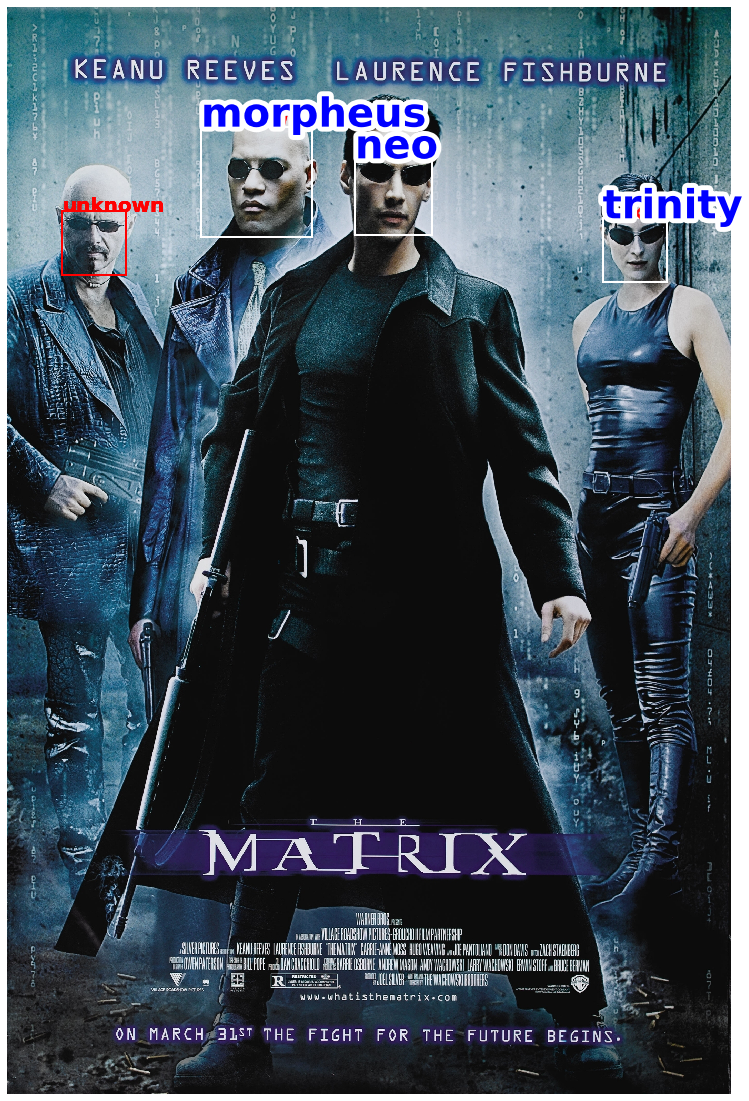

In [85]:
#Visualize Output
#각 얼굴 사진에서 얻은 정보와 전체 인물들이 나온 사진에서의 얼굴 비교
fig, ax=plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    found=False
    for name, saved_desc in descs.items():
        #두 벡터 사이의 유클리드 거리를 구함
        dist=np.linalg.norm([desc]-saved_desc, axis=1)

        if dist<0.6:
            found=True
            #이름 쓰는 부분
            text=ax.text(rects[i][0][0], rects[i][0][1], name, color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])

            #사각형 그리는 부분
            rect=patches.Rectangle(rects[i][0], rects[i][1][1]-rects[i][0][1], rects[i][1][0]-rects[i][0][0], linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)
            break

        if not found:
            text=ax.text(rects[i][0][0], rects[i][0][1], 'unknown', color='r', fontsize=20, fontweight='bold')
            rect=patches.Rectangle(rects[i][0], rects[i][1][1]-rects[i][0][1], rects[i][1][0]-rects[i][0][0], linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            
plt.axis('off')
plt.savefig('result/output.png')
plt.show()